# Database Design

____

+ What is data normalization
+ Prime and non prime attributes
+ First Normal Form
+ Second Normal Form
+ Third Normal Form
+ Online Clothing store Challenge (OLTP Database)
+ Upload the data
+ Normalization (1NF, 2NF, 3NF



## What is Normalisation
____

Processes of reducing data redundancy and improve data integrity in a relational database.

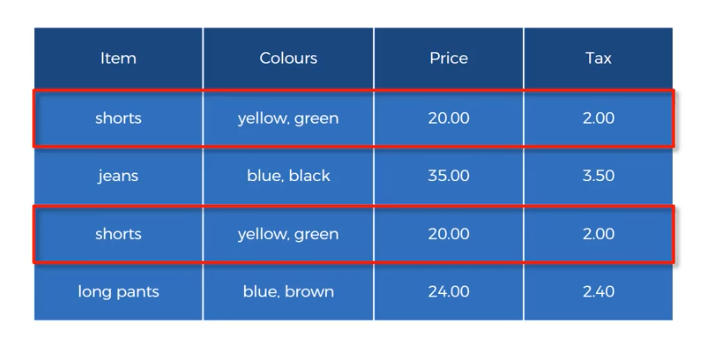

1. One value in database column (very weird if you experienced)
2. No duplicate rows.



## Prime and non prime attributes

____

We need these terms to operate in the normalisation space.

Remember another name for a column is an attribute.

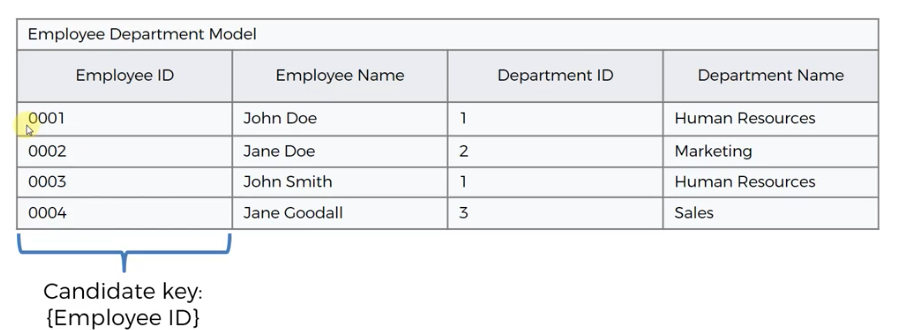
    
Here employeeId is the Candidicat key (column that unique identifies a row). So what is prima and not-primattributes?
    
    
Prime attributes (columns), that are part of candidate keys.
    
Since we have only one candicate key, we onlu have one prime attribute. And the Rest of the columns been non-primate attributes.
    
 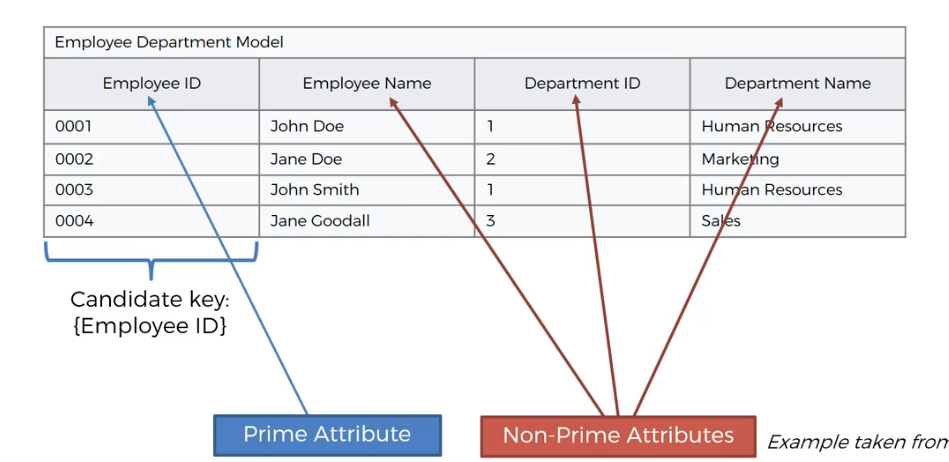   


Lets look at the following table:

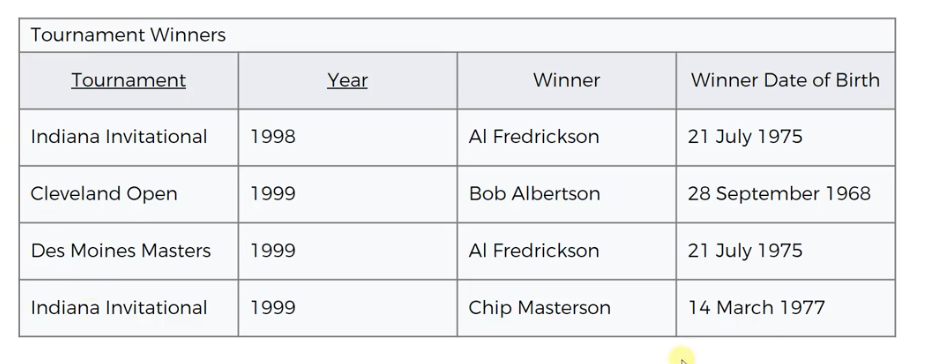
     
What is the candidate key for this table: Tournament? No, it repeast every year.

Now we need to look at combinations. But we first need to look at the purpose of the table. The table should show us the Tournament Winners. So tournaments only happens one per year.

So the combination of Tournament and Year, can be a candidate key

1. Tournament + Year


So the prime attributes are Tournament and Year, and Non prime attributes Winner and Winner DOB.


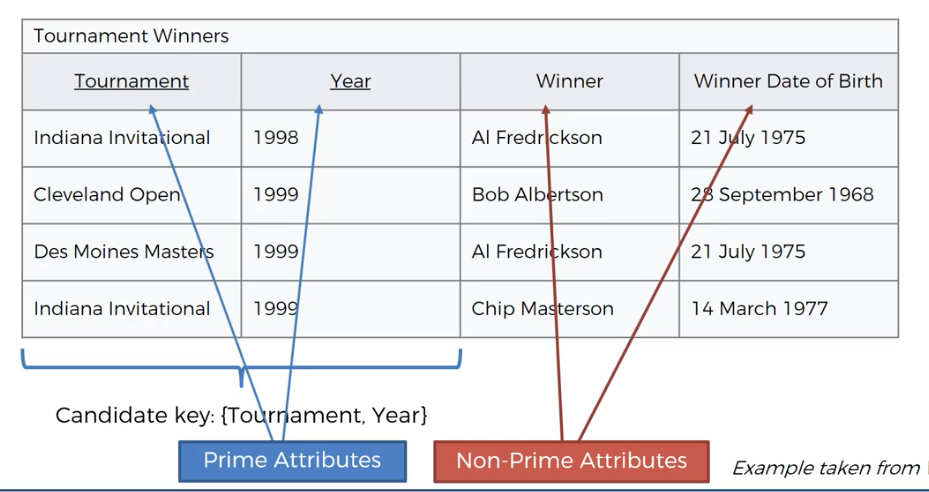

See the following example of candidate keys:

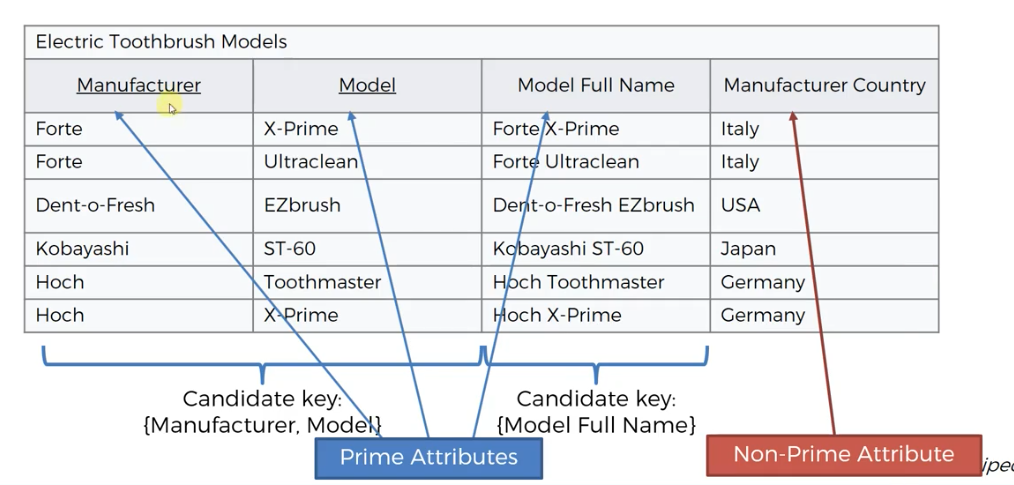

## First Normal Form

_____

In 1NF, if,

1. Does not contain duplicate rows
2. every cell contains only one value

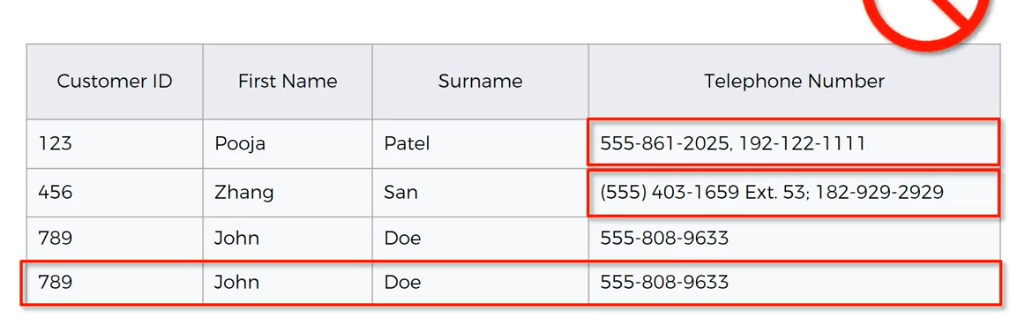

Then to fix to 1NF (no duplicate rows and not more than one value per row)

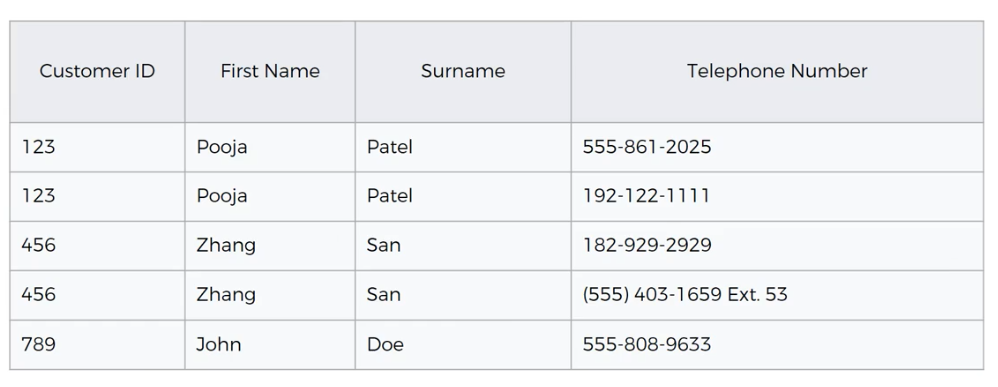


We have the following mneumonic (word that allows you to remember things)

Every non prime attribute must provide mus provide a fact about the key, the whole key and nothing about the key.

From this we can this get the different normalisation forms (different parts of this mneumonic is associated with normalisation forms):

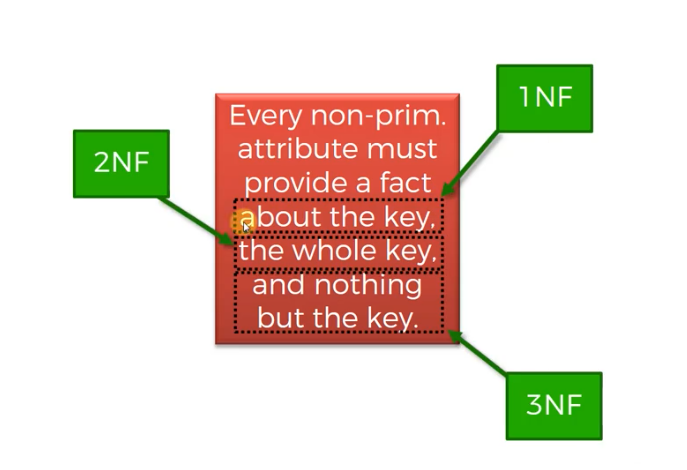


1NF - about the key - implies there has to be a key, that is a candidayte key allows us to identify a row uniquely (from the above definition, no duplicate rows allowed) 


## Second Normal Form

___

In 2NF, if,
- In 1NF
- Every non prime attributes is dependent on the whole of every candidate key.

Lets see our mneumonic to see how to rememeber the above (see under 1st 1NF)

Does the following table conform to the 2NF:

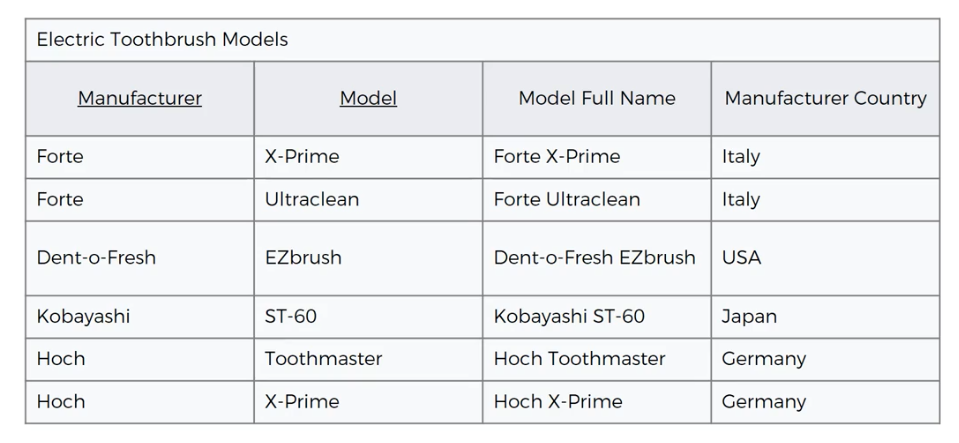

So which are prime/non prime attributes.How do we do this ? Get all the candidate key (combinations)

Candidate Keys (het unique rows):

1. Model Full Name
2. Manufaturer and Model

So prime attributes - Manufacturer, Model, Model Full Name
Non Prime attributes - Man Country

As per our definition, all non prime attributes must be dependent on te whole (whete candidate key is mulitple fields) of every candicate key

Lets take Manuafaturer and Model. Is the country dependent on Manufaturer, yes. Is the country dependent on Model, No. So country is NOT dependent on whole of Manufacturer/Model Candidate key combination.

How to fix it? But why is it important? This table will be more prone to errors. Slows donw the process of adding information.

E.g If I add a new toothbrush, which is also produced by Forte,So when we get to add the country, we know that Forte is made in Italy. But now we can say its made in Germany. Nothing prevents us from doing so.

We alreayd know that Forte, exist only in Italy, why if we add a new toothbrush do we still have to specify it.

in Essence. country should not be in this table. Country should be linked to Manufacturer table, not the toothbrsh model table.

Here is the solution: 2NF:(We end up with 2 tables)


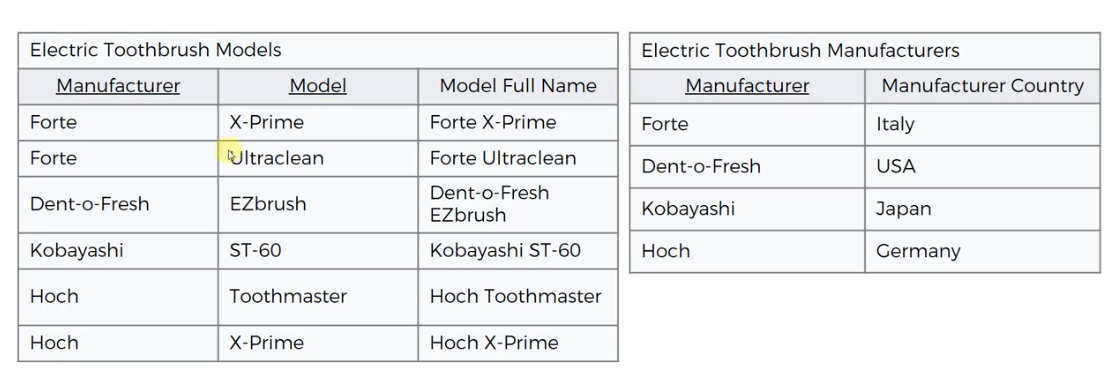

Now we have Manufaturer/Country table. This will be e reference table.


The same logic can be applied to the second table:

1. Candidate key is Manfucturer.

With County (non attribute) dependent on Man.
 

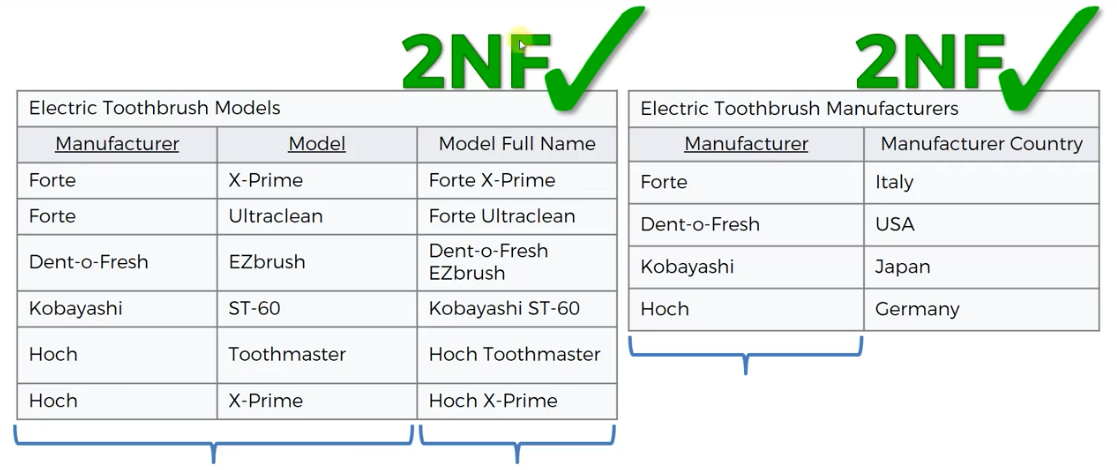

Remember non attributes must be dependent on all parts (where there are multiple columns for candidate key)
 

## Third Normal Form
___

In 3NF, if

- In 2NF
- every none prime attribute is non-transitively dependent on every candidate key

Look again at our mneumonic

--And nothing, but the key (or every candidate key)

That is it (non prime attribute) MUST be dependent on the key itself (non transitive), and not on something else


Lets look at an example

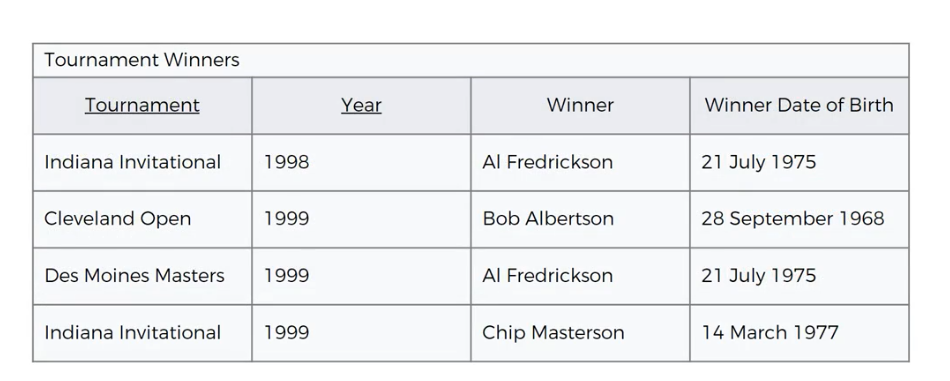


First check 1NF and 2NF...

1NF (No dup rows, and no columns have more than one value

2NF (non prime attributes dependent on whole of every candiate keys; we have candicate key(Tornament/Year) . So is Winner and Winner DOB, dependent on (whole) candidate key. Lets take Winner: is it dependent on both Tournament and year? If you know tournament, do you know winner? No. You need the year as well. So winner is dependent on whole Tournament/Year cominbation. The same logic applied to Winner DOB. So this table is in 2NF
 
But is it in 3NF?

Every non prime attributes (Winner and Winner DOB) is only dependent on key. Winner is dependent on Tournament/Year, but Winner DOB is NOT directly dependent on Tournament/Year. You first need to know the Winner. That is we need to go through the Winner, to match the Winner DOB. so there is a transitive dependence. Winner and Winner DOB is tied together.

Winner is non transitive
Winner DOB is transitive, as it need to go thrugh Winner first


So its not in 3rd Normal Form. So why is this important? Duplication of work, E.g Al Frederickson won twice, but that means his DOB is there twice as well, so there is duplication, and room for error.


Here we fix it:

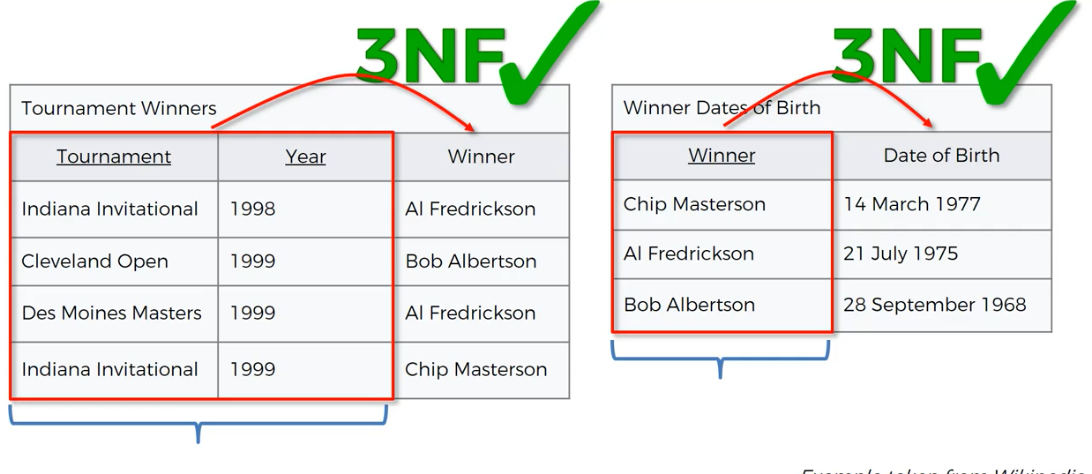

Now we free from

1. Update Insetion
2. Deletion anomolies

## Upload the data

____


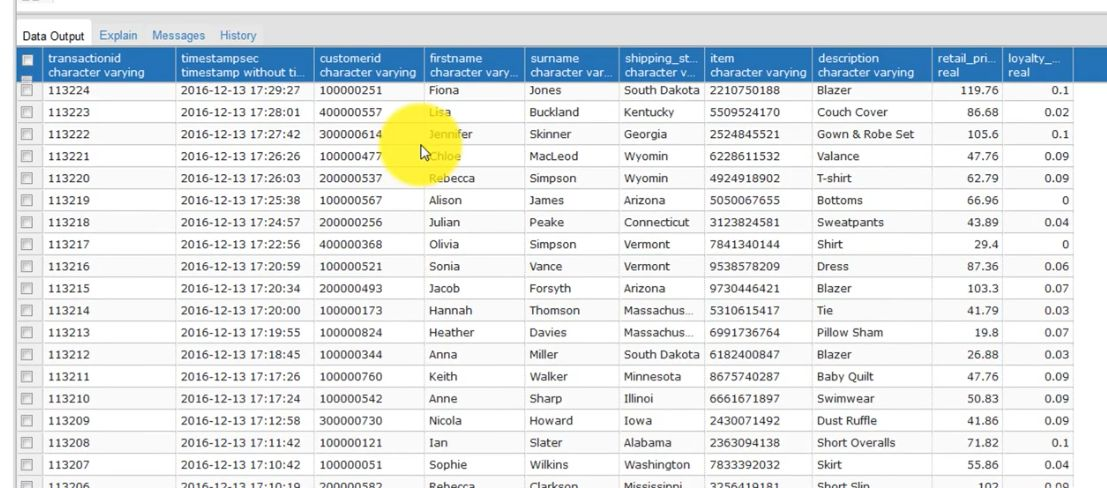


In [1]:
import psycopg2



In [2]:
connection = psycopg2.connect(user = "postgres",
                                  password = "9300273",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "postgres")
cursor = connection.cursor()

In [3]:
drop_table_query = "DROP TABLE IF EXISTS transactions;"
    
cursor.execute(drop_table_query)
connection.commit()
print("Table dropped successfully ")

Table dropped successfully 


In [4]:
drop_table_query = "DROP TABLE IF EXISTS customers;"
    
cursor.execute(drop_table_query)
connection.commit()
print("Table dropped successfully ")

Table dropped successfully 


In [5]:
drop_table_query = "DROP TABLE IF EXISTS items;"
    
cursor.execute(drop_table_query)
connection.commit()
print("Table dropped successfully ")

Table dropped successfully 


In [6]:
drop_table_query = "DROP TABLE IF EXISTS tmp;"
    
cursor.execute(drop_table_query)
connection.commit()
print("Table dropped successfully ")

Table dropped successfully 


In [7]:
create_table_query = '''CREATE TABLE transactions (
    transactionid varchar,
    timestampsec timestamp,
    customerid varchar,
    firstname varchar,
    surname varchar,
    shipping_state varchar,
    item varchar,
    description varchar,
    retail_price float(2),
    loyalty_discount float(2)); '''
    
cursor.execute(create_table_query)
connection.commit()
print("Table created successfully in PostgreSQL ")

Table created successfully in PostgreSQL 


In [8]:
populate_table_query ="""COPY transactions FROM 
      '/media/disk3/projects/Postgresql/Learn MS SQL and PostgreSQL/data/section9/P9-OLTP.csv'  
      DELIMITER ',' CSV HEADER;"""    
cursor.execute(populate_table_query)
connection.commit()
print("Table populated in PostgreSQL ")

Table populated in PostgreSQL 


## Is it in 1NF?

___


Transactioid is primary key which auto increment.

--no dups and columns have atomic values (or single values)

Can we check the above programmatically:

We can confirm that the number of rows in table is equal to the number of distinct rows in table:

```SELECT Count(*) FROM public.transactions; (3455)```

--Only select unique rows

```SELECT DISTINCT * FROM public.transactions; (also gives 3455)```

--combine the two above)

```
SELECT Count(*) FROM 
(
  SELECT DISTINCT * 
  FROM public.transactions
) as TMP;
```
(3455)

If there was any duplicates, the above number would be less.




## Is it in 2NF?

___


In 2NF, if,
- In 1NF
- Every non prime attributes is dependent on the whole of every candidate key.

We have the following fields:

This table document the purchases made by a customer.

```
transactionid
timestampsec 
customerid 
firstname 
surname 
shipping_state 
item 
description 
retail_price 
loyalty_discount  
```

1. Transction id is a candidate key, are there others? How do we go about determining it.

```
firstname        -- cannot uniquely identify a row
surname          -- cannot uniquely identify a row
shipping_state   -- cannot uniquely identify a row
item             -- cannot uniquely identify a row
description      -- cannot uniquely identify a row
retail_price     -- cannot uniquely identify a row
loyalty_discount -- cannot uniquely identify a row

```

Then you can make combinations of columns. But this will take a long time. The best is to think about it logically. What is the purpose of this table? It represents purchases made by a customer. So given this reason, we can say every single transaction should be unique. What all makes a unique transaction? What is the least amounts of columns (combination of columns) can we use to create candidate keys, i.e. column that can define unique rows?

So when the transction happens, who made the transactons,can help us identify a unique rows.

Can timestamp by itself be a candidate key? No.a Altough it by second, it can happen that two customers make a purchase at exactly the same time.

Lets combine timestamp + item, is that a candidate key? No, as two different customers can purchase the same item and same time.

Lets combine timestamp + customerid, is that a candidate key? Yes. The same person cannot be making a transaction at the same time twice. Provided the person is only allowed to have one loggin session, ie prevented from ever be logged in once. I an attempt is made to login twice, the prevous logging session will be terminnated.

2. Timestamp +Customer id  


And just by looking now, we can see there are no more candidate keys.

So first 3 columns are prime attributes:

```
transactionid
timestampsec 
customerid 
```

Rest columns are non-prime attributes: 

```
firstname 
surname 
shipping_state 
item 
description 
retail_price 
loyalty_discount  
```

No we turn on attention to non- prime attributes, and that they should be dependent on the whole of every candidate key 

Note where the candidate key is only one column, then by default all the non-prime attributes will depend on it.

Where we have a combination of columns for a candidate key, thats where we need to do an investigation.

Firstname:

Do we need both timestamp and customerid to identify the persons firstname. No, we only need customerid, we dont need timestamp. This is first case we need to work on

Surname:

Do we need both timestamp and customerid to identify the persons surname. No, we only need customerid, we dont need timestamp. This is first case we need to work on

Same with shipping_state, customerid is sufficient.


Item:


Do we need both timestamp and customerid to identify the item. Yes, we need both, we need to know customer, and what time they purchased. Also item is based on puchased, and a purchase is linked to when it was done, and who did it.


Same applies to description,price needs both 

But loyalty_discount only customer_id is sifficient to determine the discount.


So we need to get the table into 2NF:

So which columns DO NOT fully dependent on timestamp+customerid candidate key

```
firstname 
surname 
shipping_state 
loyalty_discount  
```

Solution; We need to separate out these columns into a new table (remember we also need the customerId to identiy the customer in new table, and since these columns is depending on it)

```
CREATE TABLE TMP As
SELECT customerid, 
	firstname,
	surname,
	shipping_state,
	loyalty_discount FROM public.transactions

```

If we look at the data, we see lots of duplicates, since the customer have been purchasing several times.


How do we get rid of duplicte rows? This was the reason why we created a tmp table, since now we will be able to create the actual table, i.e customer table

Next we need to remove customer specific columns from the original table, but leave the customer id field


Then drop tmp table

In [9]:
table_query ="""CREATE TABLE TMP As
SELECT customerid, 
	firstname,
	surname,
	shipping_state,
	loyalty_discount FROM public.transactions;"""    
cursor.execute(table_query)
connection.commit()
print("New Temporary Table populated in PostgreSQL ")

New Temporary Table populated in PostgreSQL 


In [10]:
table_query ="""CREATE TABLE customers AS
SELECT DISTINCT * FROM public.tmp;"""    
cursor.execute(table_query)
connection.commit()
print("Final New Table remove duplicatesin PostgreSQL ")

Final New Table remove duplicatesin PostgreSQL 


In [11]:
table_query ="""ALTER TABLE public.transactions
DROP COLUMN firstname, 
DROP COLUMN surname, 
DROP COLUMN shipping_state, 
DROP COLUMN loyalty_discount;"""    
cursor.execute(table_query)
connection.commit()
print("Drop Custmer specific columns, except customerid")

Drop Custmer specific columns, except customerid


In [12]:
drop_table_query = "DROP TABLE IF EXISTS tmp;"
    
cursor.execute(drop_table_query)
connection.commit()
print("Table dropped successfully ")

Table dropped successfully 


## Is it in 3NF?

___

In 3NF, if

- In 2NF
- every none prime attribute is non-transitively dependent on every candidate key

any non prime attribute cannot work through another attribute, thne be dependent on candidate key, it must be done directly.

We need to check both tables if they are in 3NF

Lets first look at the customers table:

```
customerid
firstname
surname 
shipping_state
loyalty_discount 
```

Remember we only have 1 candidate key. And the table is in 2NF.

Now we need to check if each of the non prime attributes are dependent on customerid.

firstname - Depends on customerid directly (non relationship with other fields)

surname - Depends on customerid directly (non relationship with other fields)

shipping_state -  Depends on customerid directly (non relationship with other fields)

loyalty_discount -  Depends on customerid directly (non relationship with other fields)


That is all the fields are dependent on the candidate key.

E.g. if you had loyalty_state_disc -- then it would not ne transitive, as it with dependended on state, then on the the customer it. Here we would need to create a separate table for it.

Essence : non prime attributes are independent of each other, but directly dependent on the candidate key



Lets first look at the transactions table:

Remember where we have following candidate keys:

1. Transaction id
2. Timestanp + customerid

```
transactionid
timestampsec
customerid
item character
description
retail_price 

```
Then we have non prime attributes:

item --non transitively dependent on candidate key

description -- transitively dependent though item, which is dependent on candidate key

retail_price -- transitively dependent though item, which is dependent on candidate key


Which part of the table does not belong here: Desciption and retail_price (withm item as primary key)

Logic applies the same as above in creating, removing duplicates, and dropping temp table

We know have the following tables:
1. Transactions
2. Customsers
3. Items

What did we do? We normalized the data to give it integrity and preventing errors.

1. Writing data is EASY
2. Reading data is HARD: we need to link (JOIN) up customer and items table to get all the information

We can thus make the following observation:

The original transaction table, reading information about row, we just read that row, with the transactionid, since all the information is right there. This is good for OLAP (Online Analytical processing, denormalized or un normalized data). That is reporting

However to perform OLTP (online transaction processing)(capturing, storing data), then writing is more important, as we want to make less errors., then our normalised data is more important. We only have to write 4 columns to transaction table.




Essence : Non transitive dependent = directly dependent (non prime attribute) on candidiatekey
Essence : transitive dependent = dependent through other non prime attributes




In [13]:
table_query ="""CREATE TABLE TMP As
SELECT item, 
	description,
	retail_price FROM public.transactions;"""    
cursor.execute(table_query)
connection.commit()
print("New Temporary Table populated in PostgreSQL ")



New Temporary Table populated in PostgreSQL 


In [14]:
table_query ="""CREATE TABLE items AS
SELECT DISTINCT * FROM public.tmp;"""    
cursor.execute(table_query)
connection.commit()
print("Final New Table remove duplicates in PostgreSQL ")

Final New Table remove duplicates in PostgreSQL 


In [15]:
table_query ="""ALTER TABLE public.transactions
DROP COLUMN description, 
DROP COLUMN retail_price;"""    
cursor.execute(table_query)
connection.commit()
print("Drop Item specific columns, except item")

Drop Item specific columns, except item


In [16]:
drop_table_query = "DROP TABLE IF EXISTS tmp;"
    
cursor.execute(drop_table_query)
connection.commit()
print("Table dropped successfully ")

Table dropped successfully 


In [17]:
if(connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed")

PostgreSQL connection is closed
